In [1]:
#OBSERVATIONS:
#1. It seems to take Capomulin some time to take effect but once it does, tumor volume decreases considerably with some peaks
#along the way. However, the trend is generally negative and may indicate that after crtain durations Capomulin may need to be
#tweaked.
#2. Ramicane seems to yield very similar results as Capomulin, and it is the second best performing treatment in terms of tumor
#volume and final timepoint of the study.
#3. There is a high level correlation (close to 1) between mouse weight and tumor volume.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
merged_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
len(merged_mouse_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_mouse_df.loc[merged_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
indexed_mouse_df = merged_mouse_df.set_index("Mouse ID")
duplicate_mouse_df = indexed_mouse_df.loc[["g989"], ["Drug Regimen", "Sex", "Age_months", "Weight (g)", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites"]]
duplicate_mouse_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_merged_mouse_df = merged_mouse_df[merged_mouse_df['Mouse ID'].isin(x)==False]
#clean_merged_mouse_df = merged_mouse_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
clean_merged_mouse_df = merged_mouse_df.loc[merged_mouse_df["Mouse ID"]!="g989", :]
clean_merged_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_merged_mouse_df["Mouse ID"].nunique()

248

In [7]:
#Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
drug_mean = clean_merged_mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
drug_median = clean_merged_mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
drug_var = clean_merged_mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
drug_std = clean_merged_mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
drug_SEM = clean_merged_mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_df = pd.DataFrame({"Mean": drug_mean, "Median": drug_median, "Variance": drug_var, "Standard Deviation": drug_std,
                           "Standard Error": drug_SEM})
summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
summary_df2 = clean_merged_mouse_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

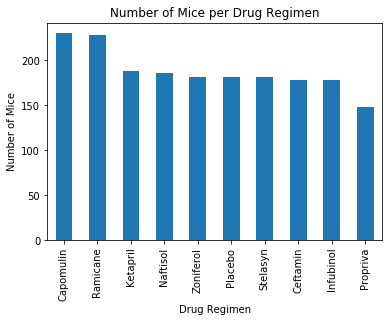

<Figure size 432x288 with 0 Axes>

In [9]:
# Bar Plots
# Generate a bar plot showing the number of mice for each treatment throughout the course of the study using pandas.
count_regimen = clean_merged_mouse_df["Drug Regimen"].value_counts()
count_regimen.plot(kind="bar")
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()
plt.tight_layout()

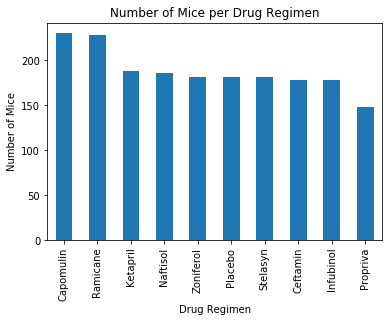

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
count_regimen2 = clean_merged_mouse_df["Drug Regimen"].value_counts()
x = count_regimen2.index.values
y = count_regimen2.values
plt.bar(x, y, width=0.5, align="center")
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(x, rotation='vertical')
plt.xlim(-0.5, (len(x) - 0.5))
plt.show()
plt.tight_layout()

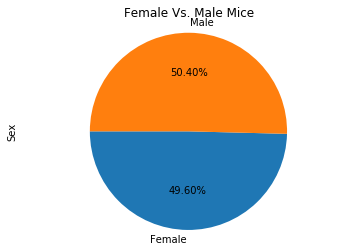

<Figure size 432x288 with 0 Axes>

In [11]:
#Pie Plots
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_by_sex = clean_merged_mouse_df["Mouse ID"].groupby([clean_merged_mouse_df["Sex"]]).nunique()
count_by_sex.plot(kind="pie",y=count_by_sex, autopct="%2.2f%%", startangle=180)
plt.title("Female Vs. Male Mice")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()
plt.tight_layout()

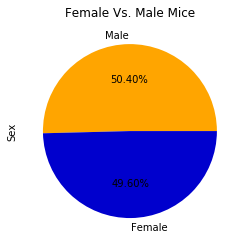

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count_by_sex2 = clean_merged_mouse_df.drop_duplicates(subset=['Mouse ID'], keep='first')

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
values = [125, 123]

# The colors of each section of the pie chart
colors = ["orange", "mediumblue" ]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0, 0)

# Creates the pie chart based upon the values above
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct="%2.2f%%", shadow=False, startangle=360)

plt.title("Female Vs. Male Mice")
plt.ylabel("Sex")
plt.show()
plt.tight_layout()

In [13]:
# Quartiles, Outliers and Boxplots
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
promising_treatments = clean_merged_mouse_df.drop_duplicates(subset=['Mouse ID'], keep='last')
promising_treatments = promising_treatments[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Timepoint"]]
promising_treatments = promising_treatments.loc[(promising_treatments["Drug Regimen"]=="Capomulin") |
                                                (promising_treatments["Drug Regimen"]=="Ramicane")
                                                | (promising_treatments["Drug Regimen"]=="Infubinol")
                                                | (promising_treatments["Drug Regimen"]=="Ceftamin")]

promising_treatments

,Mouse ID,Drug Regimen,Tumor Volume (mm3),Timepoint
9,k403,Ramicane,22.050126,45
19,s185,Capomulin,23.343598,45
29,x401,Capomulin,28.484033,45
39,m601,Capomulin,28.430964,45
49,g791,Ramicane,29.128472,45
...,...,...,...,...
1797,x822,Ceftamin,61.386660,45
1813,y163,Infubinol,67.685569,45
1845,y769,Ceftamin,68.594745,45
1855,y865,Ceftamin,64.729837,45


In [14]:
# Calculate the final tumor volume of each mouse across four each of the most promising treatment regimens.
cap_treatment = promising_treatments.loc[(promising_treatments["Drug Regimen"]=="Capomulin")]["Tumor Volume (mm3)"]
ram_treatment = promising_treatments.loc[(promising_treatments["Drug Regimen"]=="Ramicane")]["Tumor Volume (mm3)"]
inf_treatment = promising_treatments.loc[(promising_treatments["Drug Regimen"]=="Infubinol")]["Tumor Volume (mm3)"]
ceft_treatment = promising_treatments.loc[(promising_treatments["Drug Regimen"]=="Ceftamin")]["Tumor Volume (mm3)"]
ceft_treatment

493     62.999356
594     45.000000
600     56.057749
617     55.742829
840     48.722078
940     47.784682
993     61.849023
1033    68.923185
1112    67.748662
1119    57.918381
1122    46.784535
1132    59.851956
1162    64.299830
1260    59.741901
1379    61.433892
1406    64.192341
1551    45.000000
1582    52.925348
1583    45.000000
1670    67.527482
1743    45.000000
1773    64.634949
1797    61.386660
1845    68.594745
1855    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [15]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Calculate the IQR and quantitatively determine if there are any potential outliers specifically for Capomulin.
cap_quartiles = cap_treatment.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)

cap_outliers = cap_treatment.loc[(cap_treatment< cap_lower_bound) | (cap_treatment> cap_upper_bound)]

print(f"Values below {cap_lower_bound} and above {cap_upper_bound} could be Capomulin outliers.")

Values below 20.70456164999999 and above 51.83201549 could be Capomulin outliers.


In [16]:
# Calculate the IQR and quantitatively determine if there are any potential outliers specifically for Ramicane.
ram_quartiles = ram_treatment.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)

ram_outliers = ram_treatment.loc[(ram_treatment< ram_lower_bound) | (ram_treatment> ram_upper_bound)]

print(f"Values below {ram_lower_bound} and above {ram_upper_bound} could be Ramicane outliers.")

Values below 17.912664470000003 and above 54.30681135 could be Ramicane outliers.


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers specifically for Infubinol.
inf_quartiles = inf_treatment.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)

inf_outliers = inf_treatment.loc[(inf_treatment< inf_lower_bound) | (inf_treatment> inf_upper_bound)]

print(f"Values below {inf_lower_bound} and above {inf_upper_bound} could be Infubinol outliers.")

Values below 36.83290494999999 and above 82.74144559000001 could be Infubinol outliers.


In [18]:
# Calculate the IQR and quantitatively determine if there are any potential outliers specifically for Ceftamin.
ceft_quartiles = ceft_treatment.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq
ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)

ceft_outliers = ceft_treatment.loc[(ceft_treatment< ceft_lower_bound) | (ceft_treatment> ceft_upper_bound)]

print(f"Values below {ceft_lower_bound} and above {ceft_upper_bound} could be Ceftamin outliers.")

Values below 25.355449580000002 and above 87.66645829999999 could be Ceftamin outliers.


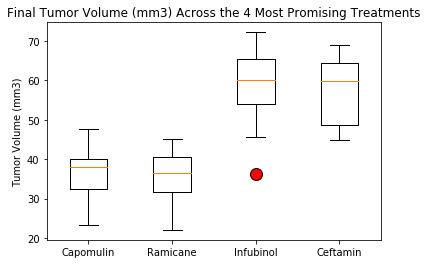

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3) Across the 4 Most Promising Treatments')
ax1.set_ylabel('Tumor Volume (mm3)')
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
ax1.boxplot([cap_treatment, ram_treatment, inf_treatment, ceft_treatment], flierprops=flierprops, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

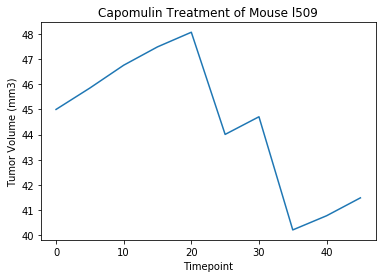

In [20]:
# Line and Scatter Plots
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse_df = clean_merged_mouse_df.loc[clean_merged_mouse_df["Drug Regimen"]=="Capomulin"]
mouse_l509_Timepoint = capomulin_mouse_df.loc[capomulin_mouse_df["Mouse ID"]=="l509"]

x_axis = mouse_l509_Timepoint["Timepoint"]
y_axis = mouse_l509_Timepoint["Tumor Volume (mm3)"]

plt.plot(x_axis,y_axis)
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [35]:
%matplotlib notebook

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mouse_df = clean_merged_mouse_df.loc[clean_merged_mouse_df["Drug Regimen"]=="Capomulin"]
size_tumor = capomulin_mouse_df.groupby("Mouse ID").mean()
size_tumor.head()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


<IPython.core.display.Javascript object>


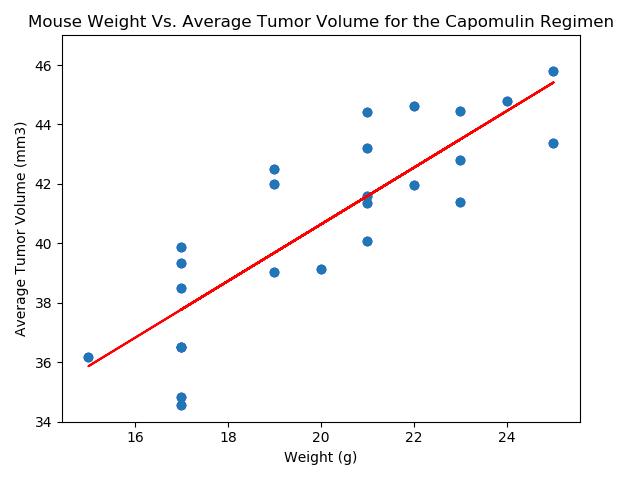

In [52]:
plt.scatter(size_tumor["Weight (g)"], size_tumor["Tumor Volume (mm3)"], marker="o", facecolors="blue")
plt.ylim(34,47)
plt.title("Mouse Weight Vs. Average Tumor Volume for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
plt.tight_layout()

In [53]:
#Calculate correlation coefficient
x = size_tumor["Weight (g)"]
y = size_tumor["Tumor Volume (mm3)"]


corr,_ = pearsonr(x,y)
print('Pearsons correlation coefficient: %.3f' %  corr)

Pearsons correlation coefficient: 0.842


In [54]:
# Correlation and Regression
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")
plt.show()